# PREDICTING HEART DISEASE USING MACHINE LEARNING

# 1. Problem defination

>i want to predict wether a patient have heart disease or not with the given clinical parameters

# 2. Data

>the original version is obtained from kaggle

# 3. evaluation

> if i can reach 85% accuracy at predicting wether or not a patient has heart disease during the proof of concept we pursue the project

# 4.  Features

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn. neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

### model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Load data



In [51]:
 df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [52]:
df.shape # number of rows and columns

(303, 14)

## data exploration(exploratory data analysis or EDA)
the goal is to find out more about the data and also become a subject matter expert on the dataset

In [53]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

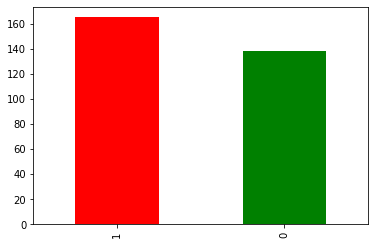

In [54]:
df["target"].value_counts().plot(kind = "bar", color =[ "red", "green"])

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [56]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [57]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# heart disease frequency according to sex 

In [58]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [59]:
# compare target coloumn with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


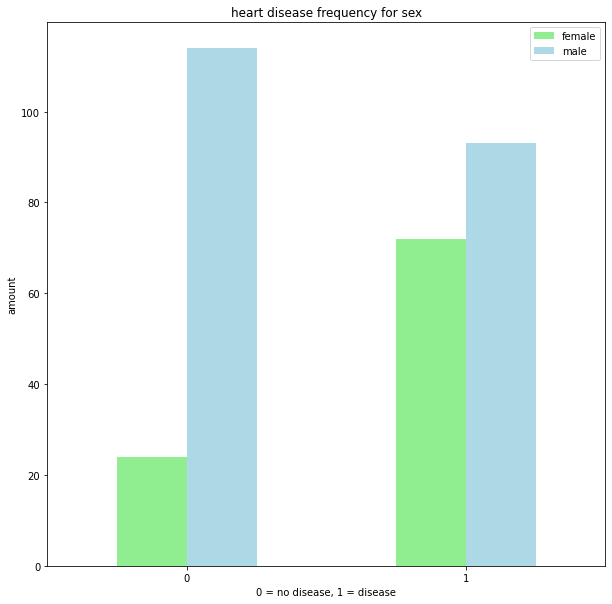

In [60]:
pd.crosstab(df.target, df.sex).plot(kind = "bar",
                                   figsize = (10, 10),
                                   color = ["lightgreen", "lightblue"]);
plt.title("heart disease frequency for sex")
plt.legend(["female", "male"])
plt.xlabel("0 = no disease, 1 = disease")
plt.ylabel("amount")
plt.xticks(rotation = 0);

In [61]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [62]:
df["thalach"].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

# Age versus maximum heart rate for heart disease

In [63]:
df.age[df.target ==1]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

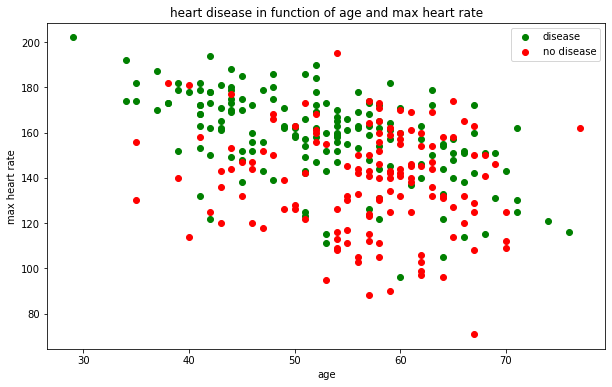

In [64]:
plt.figure(figsize = (10, 6))
plt. scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c = "green")

plt. scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c = "red")
plt.title("heart disease in function of age and max heart rate")
plt.xlabel("age")
plt.ylabel("max heart rate")
plt.legend(["disease", "no disease"]);

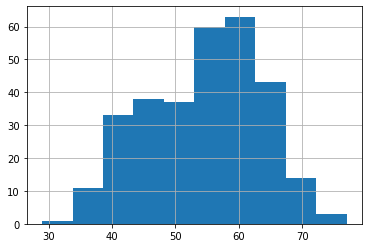

In [65]:
# checking the distribution of age column with histogram
df.age.hist();

# heart disease frequency per chest pain type

In [66]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


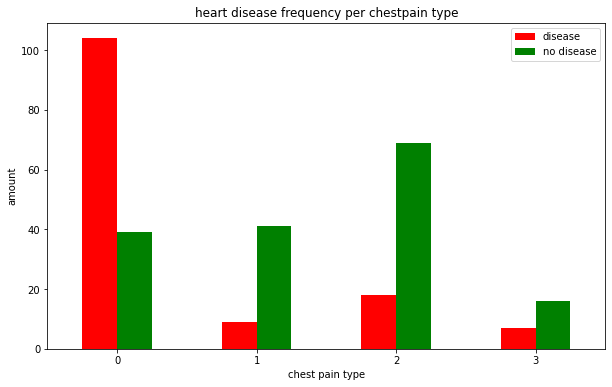

In [67]:
pd.crosstab(df.cp, df.target).plot(kind = "bar",
                                  figsize = (10, 6),
                                  color =[ "red", "green"]);
plt.title("heart disease frequency per chestpain type")
plt.xlabel("chest pain type")
plt.ylabel("amount")
plt.legend(["disease", "no disease"] )
plt.xticks(rotation = 0);

# making a correlation matrix


In [68]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


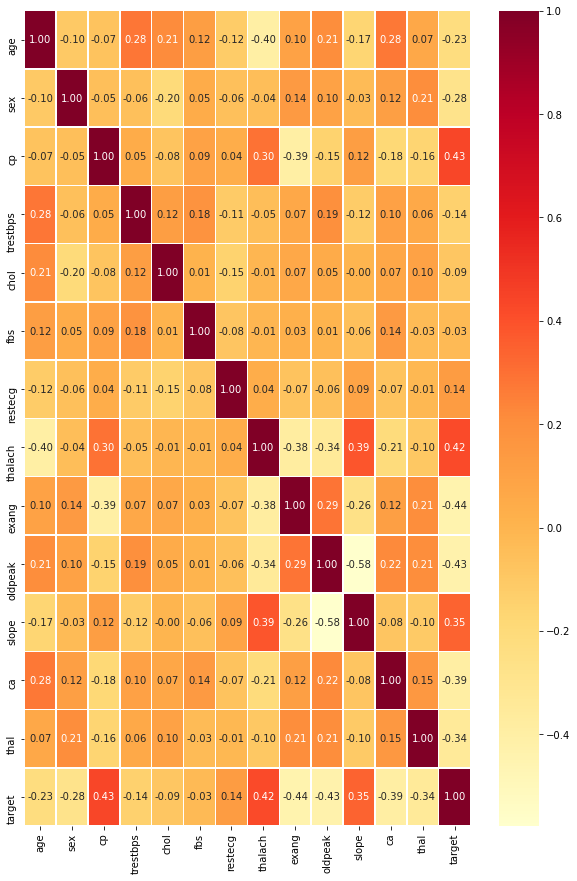

In [69]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (10, 15))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidths = 0.5,
                fmt = ".2f",
                cmap = "YlOrRd");

# modeling

In [70]:
# spliting data into x and y 
x = df.drop("target", axis = 1)
y = df["target"]

In [71]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [103]:
#split data into training and test set
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [104]:
len(x_train), len(y_train)

(242, 242)

In [110]:
np.random.seed(42)
model=   LogisticRegression()
#fit the model to the data
model.fit( x_train, y_train,)
# evaluate the model 
model.score( x_test,  y_test)


C:\Users\Olasoft computer\Documents\anaconda download\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8852459016393442

In [113]:
y_preds = model.score( x_test,  y_test)

In [98]:
np.random.seed(42)
model=   KNeighborsClassifier()
#fit the model to the data
model.fit( x_train, y_train,)
# evaluate the model 
model.score( x_test,  y_test)

0.6885245901639344

In [99]:
np.random.seed(42)
model=    RandomForestClassifier()
#fit the model to the data
model.fit( x_train, y_train,)
# evaluate the model 
model.score( x_test,  y_test)

0.8360655737704918

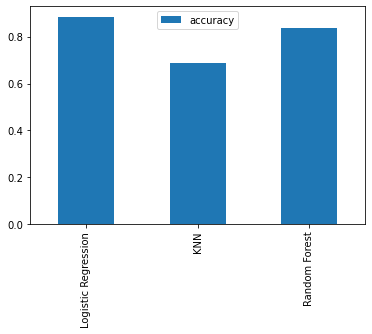

In [76]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar();

# hyper parameter tuning

In [77]:
# tunning KNN
train_scores = []
test_scores = []
# creating a list of different values for n_neighours
neighbors = range(1, 21)
KNN = KNeighborsClassifier()
#loop through different n_neigbours
for i in neighbors:
    KNN.set_params(n_neighbors = i)
    #fit the alogriths
    KNN.fit(x_train, y_train)
    #updating training score
    train_scores.append(KNN.score(x_train, y_train))
    #updating test score
    test_scores.append(KNN.score(x_test, y_test))

In [78]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [79]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

maximum KNN score on the test data: 75.41%


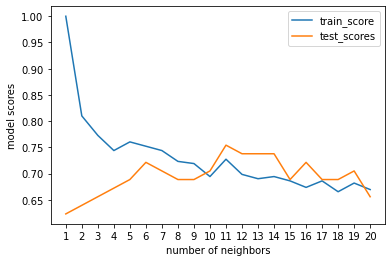

In [80]:
plt.plot(neighbors, train_scores, label = "train_score")
plt.plot(neighbors, test_scores, label = "test_scores")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("number of neighbors")
plt.ylabel("model scores")
plt.legend()
print(f"maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## the best model is LogisticRegression with the score of 0.8852459016393442 so i will adhere strictly to the model